# Projet: Absence au rendez-vous médical

## Table des matières
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Préparation des données</a></li>
<li><a href="#eda">Analyse Exploratoire des données</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#reference">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Cet ensemble de données recueille des informations sur 100 000 rendez-vous médicaux au Brésil et se concentre sur la question de savoir si les patients se présentent ou non à leur rendez-vous. Un certain nombre de caractéristiques concernant le patient sont incluses dans chaque rangée.
>
> ‘ScheduledDay’ nous indique à quel jour le patient a fixé son rendez-vous.
 ‘Neighborhood’ indique l'emplacement de l'hôpital.
 ‘Scholarship’ indique si le patient est inscrit ou non au programme de bien-être brésilien Bolsa Família.
 ‘No-show’ indique « Non » si le patient s'est présenté à son rendez-vous, et « Oui » s'il ne s'est pas présenté.
     <img src="image.jfif" width="950"/>
 >Ainsi dans cette analyse nous allons essayé de répondre aux questions suivantes:
   >>1. Quelle categorie d'âge se présente le moins aux rendez-vous?
   
   >>2. Lesquels des patients, avec bourses et sans bourses, se présentent-ils les moins au rendez-vous?
   
   >>3. En quel mois le taux d'absence est le plus élèvé?
   
   >>4. Quel impact peut avoir le genre du patient sur sa présence ou non au rendez-vous?
   
   >>5. Quelle relation existe-elle entre age et Hipertension?

In [2]:
# Importation des librairies nécessaire pour l'analyse.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
sns.set_theme(style='darkgrid')
%matplotlib inline


<a id='wrangling'></a>
## Préparations des données

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### Propertés générales

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.shape

(110527, 14)

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Nettoyage des données

######  Vérifier les valeurs manquantes les doublons et les types des données

In [7]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df['AppointmentDay']= pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay']= pd.to_datetime(df['ScheduledDay'])

In [10]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


######  Renommer la colonne No-show en No_show

In [11]:
df.rename(columns={'No-show':'No_show'}, inplace=True)

###### Récuperer juste les colonne util dans un nouveau dataframe
Nous supposons que les colonnes Schedule day et SMS_received ne serons très utile pour notre analyse

In [12]:
df_1=df.iloc[:,np.r_[:3,4:11,13]]
df_1.head()

,PatientId,AppointmentID,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,No_show
0,2.987250e+13,5642903,F,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,No


In [13]:
df_1['mois'] = pd.DatetimeIndex(df_1['AppointmentDay']).month

C:\Users\dell\AppData\Local\Temp\ipykernel_7528\1817219662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['mois'] = pd.DatetimeIndex(df_1['AppointmentDay']).month


In [14]:
df_1.drop('AppointmentDay',axis=1,inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_7528\124548681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.drop('AppointmentDay',axis=1,inplace=True)


In [15]:
df_1.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,mois
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,5.210048
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.473780
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,5.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,6.000000


In [16]:
df_1.head()

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,No_show,mois
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,0,1,0,0,No,4
1,5.589978e+14,5642503,M,56,JARDIM DA PENHA,0,0,0,0,No,4
2,4.262962e+12,5642549,F,62,MATA DA PRAIA,0,0,0,0,No,4
3,8.679512e+11,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,No,4
4,8.841186e+12,5642494,F,56,JARDIM DA PENHA,0,1,1,0,No,4


In [17]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   PatientId      110527 non-null  float64
 1   AppointmentID  110527 non-null  int64  
 2   Gender         110527 non-null  object 
 3   Age            110527 non-null  int64  
 4   Neighbourhood  110527 non-null  object 
 5   Scholarship    110527 non-null  int64  
 6   Hipertension   110527 non-null  int64  
 7   Diabetes       110527 non-null  int64  
 8   Alcoholism     110527 non-null  int64  
 9   No_show        110527 non-null  object 
 10  mois           110527 non-null  int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 9.3+ MB


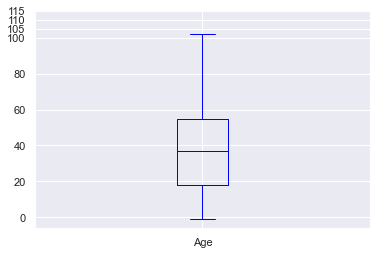

In [20]:
df_1.boxplot(column='Age', color="blue")
plt.yticks([0,20,40,60,80,100,105,110,115]);

L'age 115 est une valeur abérante, doit donc être éliminé des données.

In [19]:
df_1 = df_1[df_1.Age != 115]

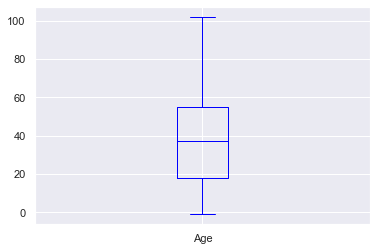

In [22]:
df_1.boxplot(column='Age', color="blue");

<a id='eda'></a>
## Analyse exploratoire des données

> C'est dans cette partie que nous allons effcetuer l'analyse en repondant à un certain nombre des questions

### Une vue sur les histogrammes du dataset

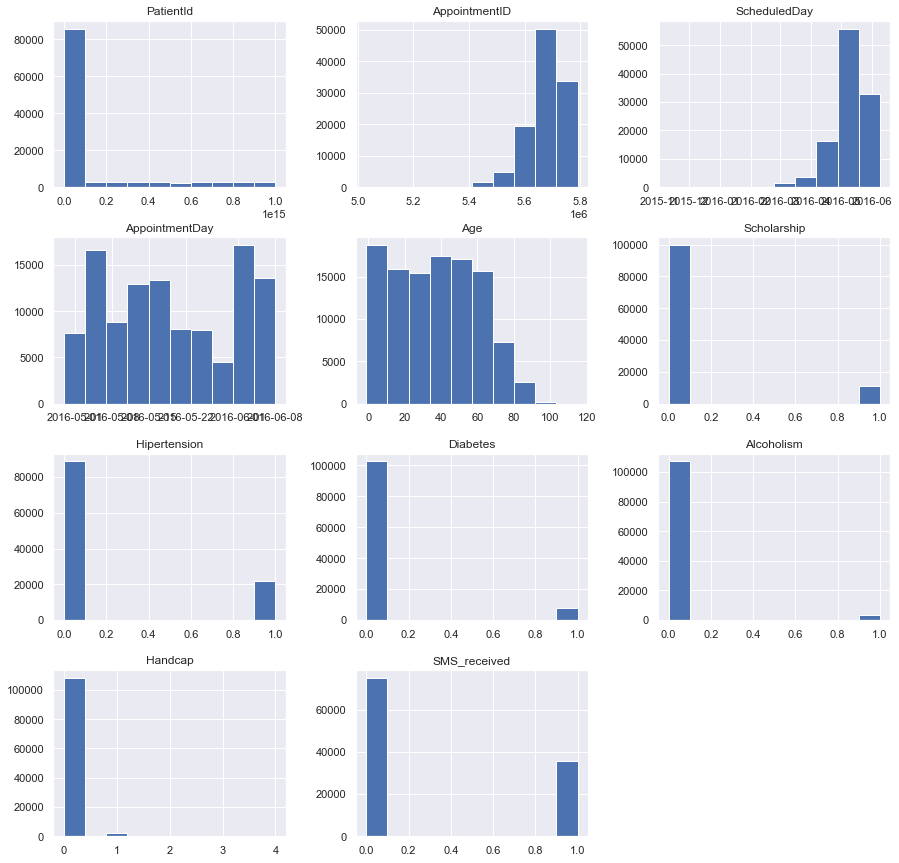

In [23]:
#Histogramme global du daframe
df.hist(figsize=(15,15));

## Exploration univariée

### Les totaux de présents et Absents

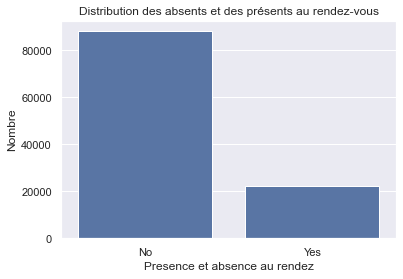

In [24]:
sns.countplot(data=df_1,x='No_show', color=sns.color_palette()[0])
plt.xlabel('Presence et absence au rendez')
plt.ylabel('Nombre')
plt.title('Distribution des absents et des présents au rendez-vous');

In [25]:
#df_1.No_show.value_counts().plot(kind='bar', color='blue',alpha=0.7);

### Question 1: Quelle categorie d'âge se présente le moins aux rendez-vous?

#### Présence et absent Selon l'âge 

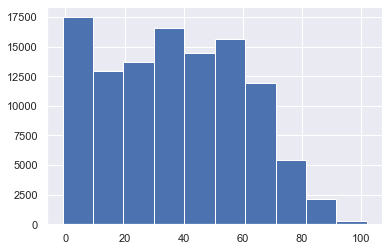

In [26]:
plt.hist(data=df_1,x='Age');

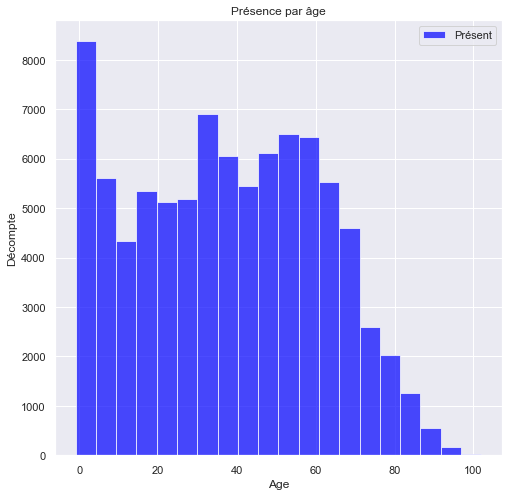

In [28]:
present=df_1[df_1['No_show']=='No']
absent=df_1[df_1['No_show']=='Yes']
present.Age.hist( color='blue',bins=20,alpha=0.7,figsize=(8,8),label="Présent");
#absent.Age.hist( color='green',bins=20,alpha=0.7,figsize=(8,8),label="Absent");
plt.xlabel("Age")
plt.ylabel("Décompte");
plt.title('Présence par âge')
plt.legend();

Histogramme combiné mettant en évidence l'âge et la présence ou l'absence parrait ambigu, il ne permet de faire une réelle observation.

#### Voyons la moyenne d'age des présents et des absents

In [29]:
#méthode pour décompte
def dec(c):
    return df_1[c].value_counts();
#méthode pour le decompte proportionnel
def dec_norme(c):
    return df_1[c].value_counts(normalize=True);

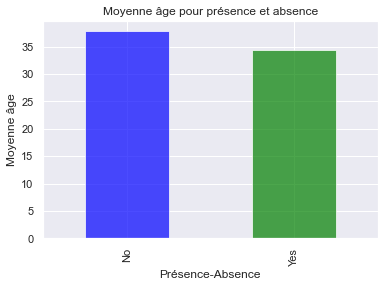

In [30]:
df_1.groupby('No_show').Age.mean().plot(kind='bar', color=['blue',"green"],alpha=0.7);
plt.title('Moyenne âge pour présence et absence');
plt.xlabel('Présence-Absence')
plt.ylabel('Moyenne âge');

La moyenne en âge des patients qui se pésentent au rendez-vous est plus élèvée que celle des patients qui se présentent pas. Donc les patients les moins agés sont généralements ceux qui ne se présentent pas aux rendez-vous.

### Question 2: Lesquels des patients, avec bourses et sans bourses, se présentent-ils les moins au rendez-vous?

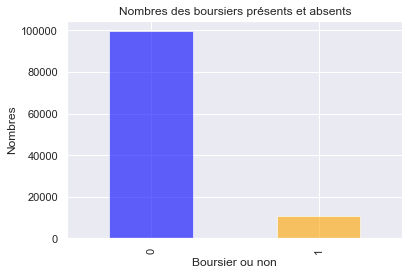

In [31]:
#df[df_1['Scholarship']==0].value_counts().plot(kind='bar')
dec('Scholarship').plot(kind='bar',alpha=0.6,color=["blue","orange"]);
plt.title('Nombres des boursiers présents et absents')
plt.xlabel('Boursier ou non')
plt.ylabel('Nombres');

Il y a donc clairement plus des patients qui se présentent aux rendez-vous que ceux qui ne viennent pas.  

### Groupage par scholarship

In [32]:
def compte(c):
    """Cette fonction permet de grouper par colonne c et donne les totaux de la colonne No_show"""
    return df_1.groupby(c)['No_show'].value_counts()
def compte_norme(c):
    """Cette fonction permet de grouper par colonne c et donne les totaux nomalisés de la colonne No_show"""
    return df_1.groupby(c)['No_show'].value_counts(normalize=True)
compte('Scholarship')

Scholarship  No_show
0            No         79923
             Yes        19738
1            No          8283
             Yes         2578
Name: No_show, dtype: int64

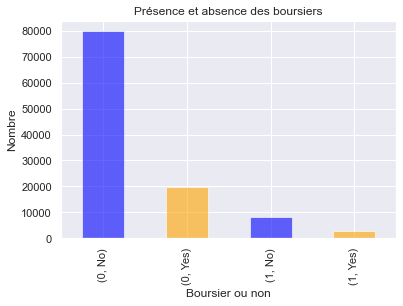

In [33]:
compte('Scholarship').plot(kind='bar',alpha=0.6,color=["blue","orange"]);
plt.title('Présence et absence des boursiers')
plt.xlabel('Boursier ou non')
plt.ylabel('Nombre');

Nous remarquons qu'il y a plus des patients boursiers qui se présentent à leurs rendez-vous plus des patients boursiers qui s'aussi. Ce qui peut dû au fait que les boursiers sont plus nombreux que les non boursiers. Pour être sûr voyons cette repartition en terme de pourcentage.

In [34]:
compte_norme('Scholarship')

Scholarship  No_show
0            No         0.801949
             Yes        0.198051
1            No         0.762637
             Yes        0.237363
Name: No_show, dtype: float64

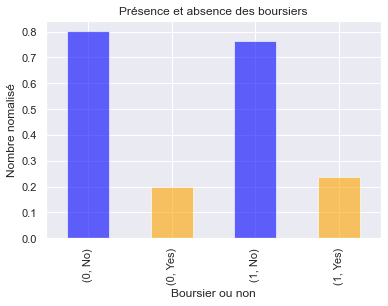

In [35]:
compte_norme('Scholarship').plot(kind='bar',alpha=0.6,color=["blue","orange"]);
plt.title('Présence et absence des boursiers')
plt.xlabel('Boursier ou non')
plt.ylabel('Nombre nomalisé');

Nous constatons que le pourcentage des non boursiers qui ne se presentent pas à leurs rendez-vous est plus élèvé.

### Question 3: En quel mois le taux d'absence est le plus élèvé?

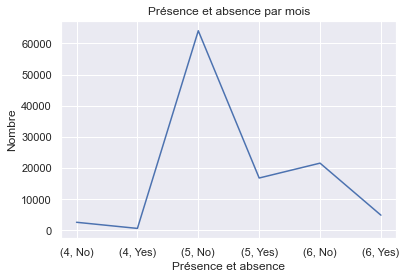

In [36]:
compte('mois').plot();
plt.title('Présence et absence par mois')
plt.xlabel('Présence et absence')
plt.ylabel('Nombre');

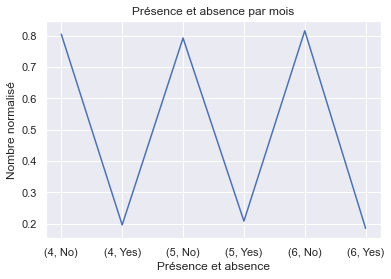

In [37]:
compte_norme('mois').plot();
plt.title('Présence et absence par mois')
plt.xlabel('Présence et absence')
plt.ylabel('Nombre normalisé');

Le taux d'absence est plus élève pendant le mois 5.

## Exploration bivariée

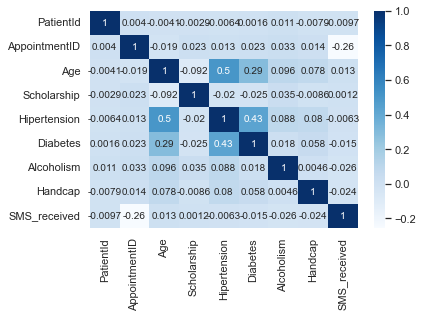

In [38]:
sns.heatmap(df.corr(),annot=True,cmap="Blues");

In [39]:
df_1.head()

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,No_show,mois
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,0,1,0,0,No,4
1,5.589978e+14,5642503,M,56,JARDIM DA PENHA,0,0,0,0,No,4
2,4.262962e+12,5642549,F,62,MATA DA PRAIA,0,0,0,0,No,4
3,8.679512e+11,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,No,4
4,8.841186e+12,5642494,F,56,JARDIM DA PENHA,0,1,1,0,No,4


### Question 4 : Quel impact peut avoir le genre du patient sur sa présence ou non au rendez-vous?

In [40]:
compte('Gender')

Gender  No_show
F       No         57244
        Yes        14591
M       No         30962
        Yes         7725
Name: No_show, dtype: int64

#### Nombres d'hommes et des femmes se présentant à leurs rendez-vous

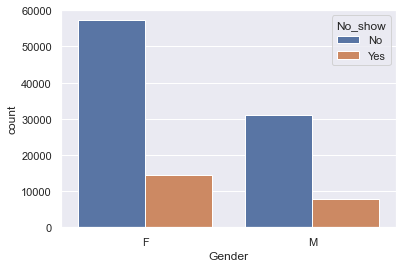

In [41]:
c1=sns.color_palette()[0]
c2=sns.color_palette()[1]
sns.countplot(data=df_1,x='Gender',hue="No_show", palette=[c1,c2]);

Il y'a clairement plus des femmes présentes et absences à leurs rendez-vous que des hommes (donc plus des femmes en nombres). Voyons maintenant les proportions des présences d'absences selon les genres.

#### Proportion des genres se présentant à leurs rendez-vous

In [42]:
compte_norme('Gender')

Gender  No_show
F       No         0.796882
        Yes        0.203118
M       No         0.800321
        Yes        0.199679
Name: No_show, dtype: float64

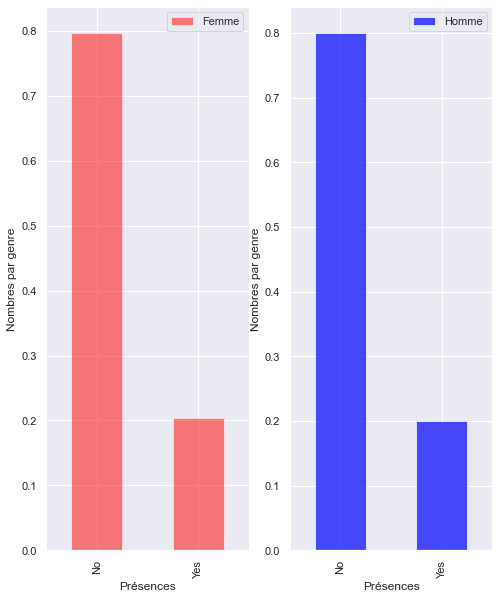

In [43]:
Homme=df_1['Gender']=="M";
Femme=df_1['Gender']=="F";
plt.figure(figsize=(8,10))
plt.subplot(1,2,1)
df_1[Femme]['No_show'].value_counts(normalize=True).plot(kind='bar',color="red",label="Femme", alpha=0.5)
plt.xlabel('Présences')
plt.ylabel('Nombres par genre')
plt.legend()
plt.subplot(1,2,2)
df_1[Homme]['No_show'].value_counts(normalize=True).plot(kind='bar',color="blue",label="Homme", alpha=0.7)
plt.xlabel('Présences')
plt.ylabel('Nombres par genre')
plt.legend();

Le pourcentage des femmes qui ne se présentent pas à leurs rendez-vous est legèrement plus élèvé que celui des hommes.

### Question 5: Quelle relation existe-elle entre age et Hipertension

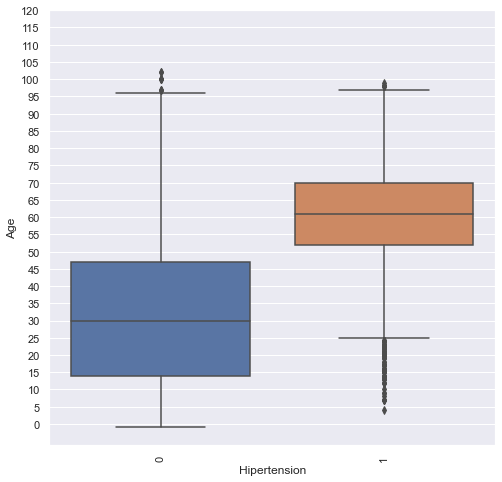

In [44]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df_1,x='Hipertension',y='Age');
plt.yticks(np.arange(0,125,5))
plt.xticks(rotation=90);

In [45]:
df_1.groupby('Hipertension')['Age'].mean()

Hipertension
0    31.304806
1    60.611101
Name: Age, dtype: float64

In [46]:
df_1.groupby('Hipertension')['Age'].median()

Hipertension
0    30.0
1    61.0
Name: Age, dtype: float64

In [47]:
df_1[df_1['Hipertension']==1]['Age'].min()

4

Ceci resemble plutôt à une valeur abérrante, puisqu'il est qu'en même curieux de voir un enfant de 4 ans atteint d'Hipertension.

In [48]:
df_1[df_1['Hipertension']==1]['Age'].max()

99

La mojorité des personnes atteintes d'hypertention ont un âge compris entre 51 et  71 ans.

<a id='conclusions'></a>
## Conclusions
Nous pouvons au final tirez les conclusions suivantes:
> **1**: Les patients les moins agés sont généralement ceux qui ne se présentent pas à leurs rendez-vous.

> **2**: Les patients boursiers sont généralement ceux qui se présentent les plus à leurs rendez-vous.

> **3**: Le groupe féminin a un pourcentage d'absence legèrement plus élèvé que le groupe masculin.

> **4**: Le mois de mai enregistre le taux d'absence au rendez-vous le plus élèvé.

Notre analyse peut présenter des limitations dont entre autres les suivantes:
>Les restants des colonnes comme celle de Neighbourhood ne nous semble pas impactante quand à la présence ou l'absence d'un patient à son rendez-vous.

> L'incapacité de pouvoir donnez une information précise quand à la probalité qu'un patient programmé se présente à son rendez-vous.

<a id='reference'></a>
## References

<ul>
<li>Audacity</li>
<li>Stackoverflow</li>
<li>Documentation officelle andas </li>
<li>Documentation officelle Numpy</li>
<li>Documentation officelle Matplotlib</li>
<li>Documentation officelle Seaborn</li>
</ul>